In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
ATP_color = '#332288'
dATP_color = '#44AA99'

In [12]:
ATP_cluster_df = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_dATP/combined.cnumvtime.dat',
                            delim_whitespace = True)
ATP_cluster_df

,#Frame,C1
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
29995,29996,10
29996,29997,10
29997,29998,10
29998,29999,10


In [15]:
skip_inds = []
results_list = []
for i in range(12):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
ATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(12):
    if i not in skip_inds:
        print(i,ATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(ATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

/tmp/ipykernel_25627/2635124244.py:4: UserWarning: loadtxt: Empty input file: "/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c0/output_rates.txt"
  a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))
/tmp/ipykernel_25627/2635124244.py:4: UserWarning: loadtxt: Empty input file: "/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c3/output_rates.txt"
  a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))
/tmp/ipykernel_25627/2635124244.py:4: UserWarning: loadtxt: Empty input file: "/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c4/output_rates.txt"
  a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))


0
3
4
1 5496
2 5446
5 1362
6 1140
7 1107
8 1042
9 909
10 824
11 467


[ 14.1055  14.2794  14.4557 ... 262.898  263.278  264.532 ]
[ 14.889   14.9954  15.0049 ... 259.351  259.588  260.107 ]
[ 15.1428  15.3439  15.3547 ... 286.415  286.697  286.884 ]
[ 15.1482  15.2133  15.3225 ... 259.556  259.836  259.963 ]
[ 14.4373  15.4253  15.5706 ... 258.658  259.198  259.769 ]
[ 15.0971  15.2114  15.2722 ... 257.801  258.04   258.959 ]
[ 14.6317  14.8871  15.1863 ... 263.477  265.007  265.927 ]
[ 15.1025  15.2061  15.6582 ... 261.346  262.706  262.732 ]


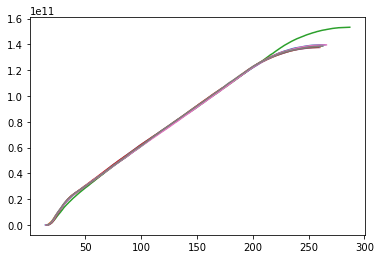

In [16]:

for i in range(8):
    plt.plot(np.array(results_list)[i][:,0], np.array(results_list)[i][:,2])
    print(np.array(results_list)[i][:,0])
    

In [17]:
def calc_wa(input_array, input_weights):
    x_min = max(input_array[:,0,0])
    x_max = 150
    x = np.linspace(x_min, x_max, 150)
    wa = np.zeros(len(x))
    for i in range(input_array.shape[0]):
        wa = wa + np.interp(x, input_array[i,:,0], input_array[i,:,2])*input_weights[i]
    return x, wa
        
x, wa = calc_wa(np.array(results_list), keep_weights)

In [18]:
np.array((x,wa)).T

array([[1.51482000e+01, 2.20443959e+07],
       [1.60532456e+01, 1.03952506e+08],
       [1.69582913e+01, 4.21284802e+08],
       [1.78633369e+01, 9.25652424e+08],
       [1.87683826e+01, 1.54777497e+09],
       [1.96734282e+01, 2.32445317e+09],
       [2.05784738e+01, 3.28334247e+09],
       [2.14835195e+01, 4.37302985e+09],
       [2.23885651e+01, 5.58145895e+09],
       [2.32936107e+01, 6.84794035e+09],
       [2.41986564e+01, 8.02156739e+09],
       [2.51037020e+01, 9.14465040e+09],
       [2.60087477e+01, 1.02487605e+10],
       [2.69137933e+01, 1.12941969e+10],
       [2.78188389e+01, 1.23445968e+10],
       [2.87238846e+01, 1.34478769e+10],
       [2.96289302e+01, 1.45384732e+10],
       [3.05339758e+01, 1.56272444e+10],
       [3.14390215e+01, 1.66219514e+10],
       [3.23440671e+01, 1.75241816e+10],
       [3.32491128e+01, 1.84115160e+10],
       [3.41541584e+01, 1.92348540e+10],
       [3.50592040e+01, 2.00637784e+10],
       [3.59642497e+01, 2.08468950e+10],
       [3.686929

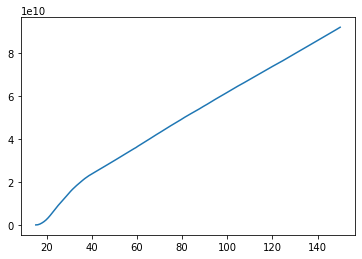

In [19]:
plt.plot(x,wa)

In [20]:
save_name = input('Enter a filename (without extension) to save: ')

Enter a filename (without extension) to save: dATP_Ca_i


In [21]:
np.savetxt(save_name+'.csv', np.array((x,wa)).T)
print('Saved as {}'.format(save_name+'.csv'))

Saved as dATP_Ca_i.csv


In [3]:
ATP_final = np.loadtxt('ATP_Ca_i.csv')
dATP_final = np.loadtxt('dATP_Ca_i.csv')

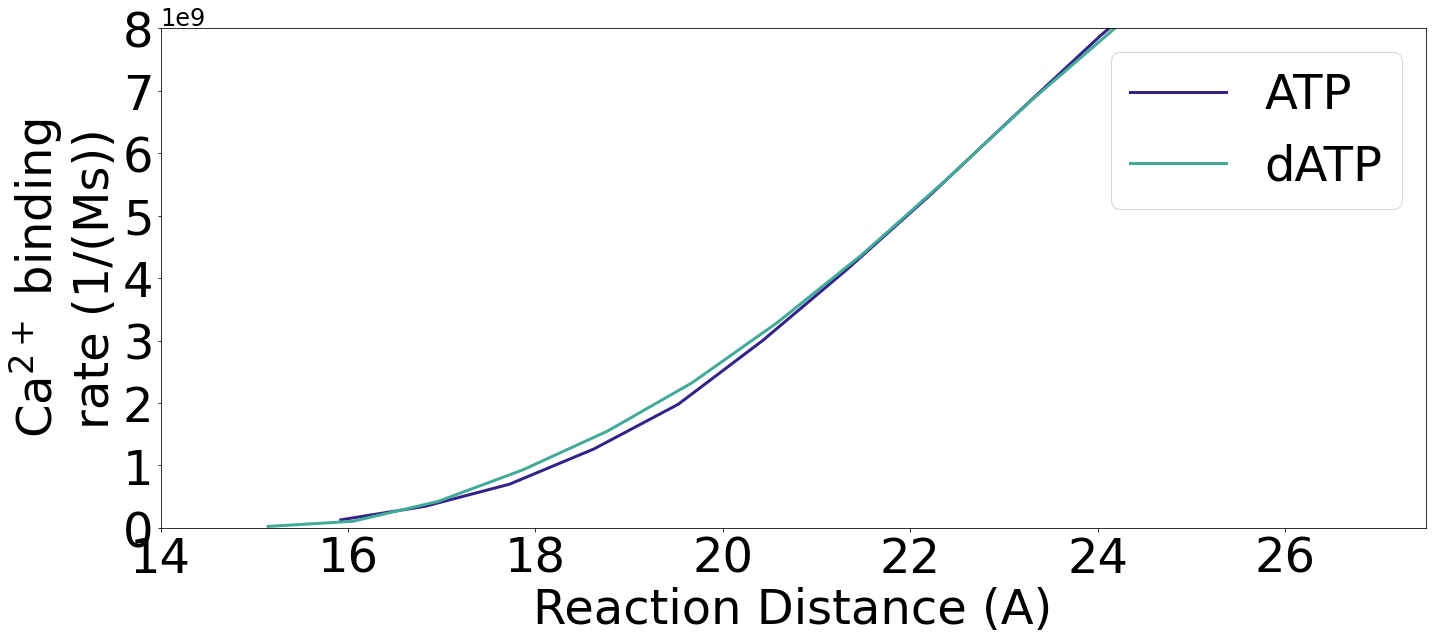

In [6]:
figure1 = plt.figure(figsize = (20,9))

plt.plot(ATP_final[:,0], ATP_final[:,1], color = ATP_color, linewidth = 3, label = 'ATP')
plt.plot(dATP_final[:,0], dATP_final[:,1], color = dATP_color, linewidth = 3, label = 'dATP')
plt.xlim(14,27.5)
plt.ylim(0,8e9)
plt.yticks(fontsize=48)
plt.legend(fontsize = 48)
plt.xticks(fontsize=48)
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(24)
plt.xlabel('Reaction Distance (A)', fontsize = 48)
plt.ylabel('Ca$^{2+}$ binding\nrate (1/(Ms))', fontsize = 48)
plt.tight_layout()

plt.savefig('Ca_site_i.svg')

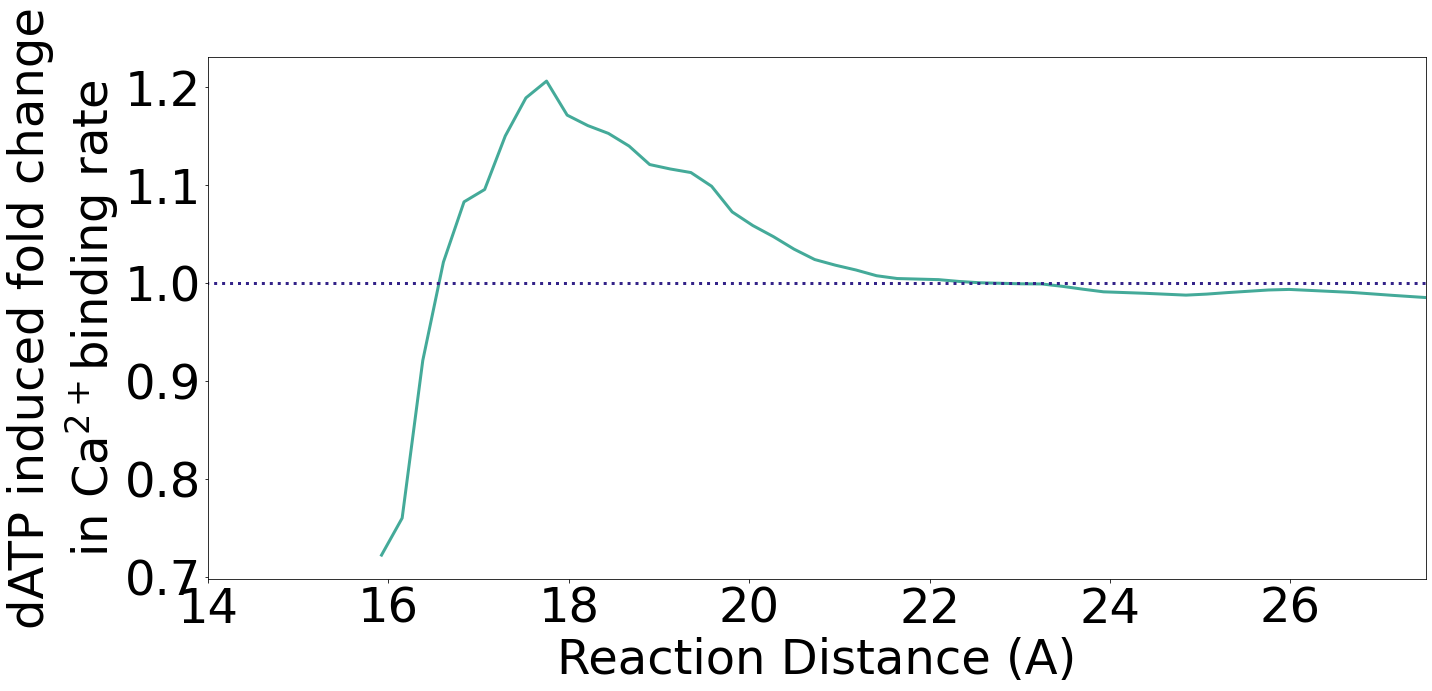

In [5]:
figure1 = plt.figure(figsize = (20,9))

start_interp = min(ATP_final[:,0])
x  = np.linspace(start_interp, 50, 150)
plt.plot(x, 
         np.interp(x, dATP_final[:,0], dATP_final[:,1])/np.interp(x, ATP_final[:,0], ATP_final[:,1]),
        color = dATP_color, linewidth = 3)
lim = plt.xlim()
plt.plot((0,60),(1,1),':', color = ATP_color, linewidth = 3)

plt.xlim(14,27.5)

plt.yticks(fontsize=48)

plt.xticks(fontsize=48)

plt.xlabel('Reaction Distance (A)', fontsize = 48)
plt.ylabel('dATP induced fold change\nin Ca$^{2+}$binding rate', fontsize = 48)
plt.tight_layout()
plt.savefig('Change_Ca_site_i.svg')